In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

View UMAP results for baseline

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from tfumap.paths import FIGURE_DIR, save_fig

In [8]:
from tfumap.paths import MODEL_DIR, DATA_DIR
from tfumap.semisupervised_keras import pretrained_networks

In [9]:
dataset = "fmnist"
datasets = [dataset]
aug_types = [
    "augmented",
    "umap_augmented_learned",
]
dset_sizes = [4, 16, 64, 256, 1024, "full"]

In [25]:
from tfumap.semisupervised_keras import load_dataset

In [27]:
(
    X_train,
    X_test,
    X_labeled,
    Y_labeled,
    Y_masked,
    X_valid,
    Y_train,
    Y_test,
    Y_valid,
    Y_valid_one_hot,
    Y_labeled_one_hot,
    num_classes,
    dims
) = load_dataset(dataset, 'full')

In [10]:
results_loc = MODEL_DIR / 'semisupervised-keras' 

In [17]:
results_df = pd.DataFrame(columns=['dataset', 'labels_per_class', 'augmented', 'timestamp', 'location', 'test_acc', 'dset_size_title', 'z'])
for dataset in datasets:

    for aug_type in aug_types:
        for dset_size in dset_sizes:
                
            dset_timestamp = pretrained_networks[dataset][aug_type][dset_size]
            dset_loc = results_loc / dataset/ str(dset_size) / dset_timestamp
            loc_list = list(dset_loc.glob('test_loss.npy'))
            if dset_size == 'full':
                if aug_type == 'augmented':
                    print(loc_list)
                    print(aug_type)
            if len(loc_list) == 0:
                print(aug_type, dset_size, dataset, dset_loc)
                continue
            test_loss, test_acc = np.load(loc_list[0])
            dset_size_title = str(dset_size)
            z = np.load(MODEL_DIR / 'semisupervised-keras' / dataset / str(dset_size) / dset_timestamp / 'train_embedding.npy')

            dset_size = str(dset_size) if dset_size is not 'full' else 4096
            results_df.loc[len(results_df)] = [
                dataset, dset_size, aug_type, dset_timestamp, dset_loc, test_acc, dset_size_title, z
            ]
results_df            

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/fmnist/full/fmnist_full____2020_08_25_17_21_42_014099_baseline_augmented/test_loss.npy')]
augmented


,dataset,labels_per_class,augmented,timestamp,location,test_acc,dset_size_title,z
0,fmnist,4,augmented,fmnist_4____2020_08_25_17_18_57_856259_baselin...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.6920,4,"[[10.393758, -2.020944], [11.929917, 12.511226..."
1,fmnist,16,augmented,fmnist_16____2020_08_25_17_19_58_221943_baseli...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7962,16,"[[-2.1581972, 1.3022537], [8.575931, 6.300448]..."
2,fmnist,64,augmented,fmnist_64____2020_08_25_17_20_33_647542_baseli...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8598,64,"[[-1.0286723, 6.875878], [15.414332, 4.0524755..."
3,fmnist,256,augmented,fmnist_256____2020_08_25_17_20_55_354044_basel...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9009,256,"[[-1.0636041, 7.117078], [8.323748, 5.9920297]..."
4,fmnist,1024,augmented,fmnist_1024____2020_08_25_17_21_21_486291_base...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9322,1024,"[[-1.3391067, 7.3785586], [16.569166, 2.971739..."
5,fmnist,4096,augmented,fmnist_full____2020_08_25_17_21_42_014099_base...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9488,full,"[[-1.7859054, 2.3363936], [6.9925246, 5.014682..."
6,fmnist,4,umap_augmented_learned,fmnist_0.0_4____2020_08_25_22_52_13_661088_uma...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7470,4,"[[10.496487, 3.1053636], [-9.009564, -0.911003..."
7,fmnist,16,umap_augmented_learned,fmnist_0.0_16____2020_08_25_22_53_12_075808_um...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8263,16,"[[13.519086, 7.727406], [-6.7806497, 4.809623]..."
8,fmnist,64,umap_augmented_learned,fmnist_0.0_64____2020_08_25_22_58_52_822672_um...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8797,64,"[[-0.71760917, -0.061636303], [8.348473, 4.750..."
9,fmnist,256,umap_augmented_learned,fmnist_0.0_256____2020_08_25_22_59_00_936495_u...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9081,256,"[[-2.0815666, -0.7665669], [14.055483, 1.25001..."


In [31]:
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [41]:
import seaborn as sns

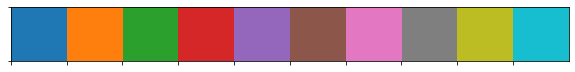

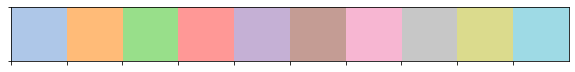

In [46]:
tab20 = sns.color_palette('tab20', 20)
tab20_dark = tab20[::2]
tab20_light = tab20[1::2]
sns.palplot(tab20_dark)
sns.palplot(tab20_light)

In [50]:
from matplotlib.colors import ListedColormap
darkcmap = ListedColormap(sns.color_palette(tab20_dark).as_hex())
lightcmap = ListedColormap(sns.color_palette(tab20_light).as_hex())

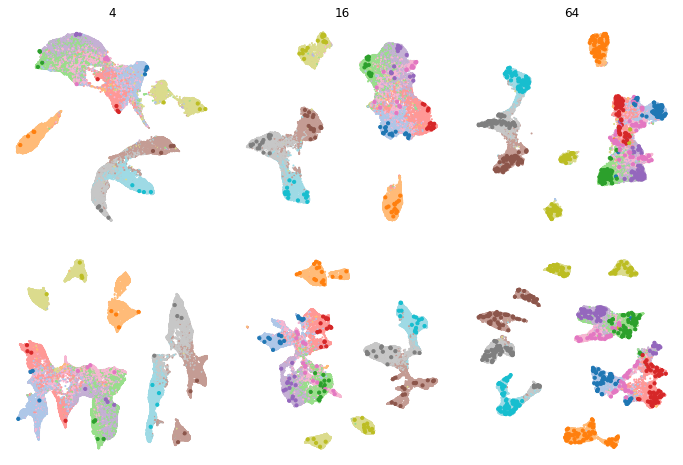

In [62]:
dss_list = [4, 16, 64]
fig, axs = plt.subplots(
    ncols=len(dss_list),
    nrows=2,
    figsize=(len(dss_list) * 4, 8),
    gridspec_kw={"wspace": 0.1, "hspace": 0.1},
)
for dssi, dset_size in tqdm(enumerate(dss_list)):

    (
        X_train,
        X_test,
        X_labeled,
        Y_labeled,
        Y_masked,
        X_valid,
        Y_train,
        Y_test,
        Y_valid,
        Y_valid_one_hot,
        Y_labeled_one_hot,
        num_classes,
        dims,
    ) = load_dataset(dataset, dset_size)

    axs[0, dssi].set_title(dset_size)
    for ati, aug_type in enumerate(aug_types):
        ax = axs[ati, dssi]
        row = results_df[
            (results_df.augmented == aug_type)
            & (results_df.dset_size_title == str(dset_size))
        ].iloc[0]
        embedding = row.z
        ax.scatter(
            embedding[:, 0],
            embedding[:, 1],
            c=Y_train.flatten(),
            s=1,
            alpha=1,
            cmap=lightcmap,
            rasterized=True,
        )
        ax.scatter(
            embedding[Y_masked != -1, 0],
            embedding[Y_masked != -1, 1],
            c=Y_train[Y_masked != -1].flatten(),
            s=10,
            alpha=1,
            cmap=darkcmap,
            rasterized=True,
        )
        ax.axis("off")